In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd  


def simple_linear_svm():
    #download data set: https://drive.google.com/file/d/13nw-uRXPY8XIZQxKRNZ3yYlho-CYm_Qt/view
    #info: https://archive.ics.uci.edu/ml/datasets/banknote+authentication

    # load data
    bankdata = pd.read_csv("./bill_authentication.csv")  

    # see the data
    bankdata.shape  

    # see head
    bankdata.head()  

    # data processing
    X = bankdata.drop('Class', axis=1)  
    y = bankdata['Class']  

    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  

    # train the SVM
    from sklearn.svm import SVC  
    svclassifier = SVC(kernel='linear')  
    svclassifier.fit(X_train, y_train)  

    # predictions
    y_pred = svclassifier.predict(X_test)  

    # Evaluate model
    from sklearn.metrics import classification_report, confusion_matrix  
    print(confusion_matrix(y_test,y_pred))  
    print(classification_report(y_test,y_pred))  
    # TODO: Evaluates perfomance of Polynomial Kernel, Gaussian Kernel, and Sigmoid Kernel. (DONE)
    

In [2]:
# Iris dataset  https://archive.ics.uci.edu/ml/datasets/iris4
def import_iris():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

    # Assign colum names to the dataset
    colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

    # Read dataset to pandas dataframe
    irisdata = pd.read_csv(url, names=colnames) 

    # process
    X = irisdata.drop('Class', axis=1)  
    y = irisdata['Class']  

    # train
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  
    return (X_train, X_test, y_train, y_test)

def import_iris_raw_two_columns():
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"

    # Assign colum names to the dataset
    colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

    # Read dataset to pandas dataframe
    irisdata = pd.read_csv(url, names=colnames) 

    # process
    X = irisdata.drop('Class', axis=1)  
    X = X.drop(columns=['petal-length', 'petal-width'])
    y = irisdata['Class'] 
    classnames, indices = np.unique(y, return_inverse=True)
    return X, indices

def import_iris_two_columns():
    X, y = import_iris_raw_two_columns()

    # train
    from sklearn.model_selection import train_test_split  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20)  
    return (X_train, X_test, y_train, y_test)




In [3]:
def polynomial_kernel(X_train, X_test, y_train, y_test):
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
        
    poly_kernel_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="poly", degree=8))
    ])

    poly_kernel_svm_clf.fit(X_train, y_train)
    
    return poly_kernel_svm_clf

In [4]:
def gaussian_kernel(X_train, X_test, y_train, y_test):
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    
    rbf_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="rbf", random_state=42))
    ])

    rbf_svm_clf.fit(X_train, y_train)
    
    return rbf_svm_clf

In [5]:
def sigmoid_kernel(X_train, X_test, y_train, y_test):
    from sklearn.pipeline import Pipeline
    from sklearn.preprocessing import StandardScaler
    from sklearn.svm import SVC
    
    sigmoid_svm_clf = Pipeline([
        ("scaler", StandardScaler()),
        ("svm_clf", SVC(kernel="sigmoid", random_state=42))
    ])

    sigmoid_svm_clf.fit(X_train, y_train)
    
    return sigmoid_svm_clf

### Load Data

In [6]:
X_train, X_test, y_train, y_test = import_iris()

### Polynomial Kernel Results

In [7]:
from sklearn.metrics import classification_report, confusion_matrix  

poly_kernel_svm_clf = polynomial_kernel(X_train, X_test, y_train, y_test)
y_pred = poly_kernel_svm_clf.predict(X_test)
    
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))

[[ 8  0  0]
 [ 0 14  0]
 [ 0  3  5]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.82      1.00      0.90        14
 Iris-virginica       1.00      0.62      0.77         8

      micro avg       0.90      0.90      0.90        30
      macro avg       0.94      0.88      0.89        30
   weighted avg       0.92      0.90      0.89        30



### Gaussian Kernel Results

In [8]:
from sklearn.metrics import classification_report, confusion_matrix  

rbf_svm_clf = gaussian_kernel(X_train, X_test, y_train, y_test)
y_pred = rbf_svm_clf.predict(X_test)
    
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))

[[ 8  0  0]
 [ 0 14  0]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.93      1.00      0.97        14
 Iris-virginica       1.00      0.88      0.93         8

      micro avg       0.97      0.97      0.97        30
      macro avg       0.98      0.96      0.97        30
   weighted avg       0.97      0.97      0.97        30



### Results Sigmoid Kernel

In [9]:
from sklearn.metrics import classification_report, confusion_matrix  

sigmoid_svm_clf = sigmoid_kernel(X_train, X_test, y_train, y_test)
y_pred = sigmoid_svm_clf.predict(X_test)

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test,y_pred))

[[ 8  0  0]
 [ 0 11  3]
 [ 0  1  7]]
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00         8
Iris-versicolor       0.92      0.79      0.85        14
 Iris-virginica       0.70      0.88      0.78         8

      micro avg       0.87      0.87      0.87        30
      macro avg       0.87      0.89      0.87        30
   weighted avg       0.88      0.87      0.87        30



## Plot kernels using iris 'sepal-length' and 'sepal-width'

In [10]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    plt.show()

### Load data for sepal-length' and 'sepal-width'

Automatically created module for IPython interactive environment


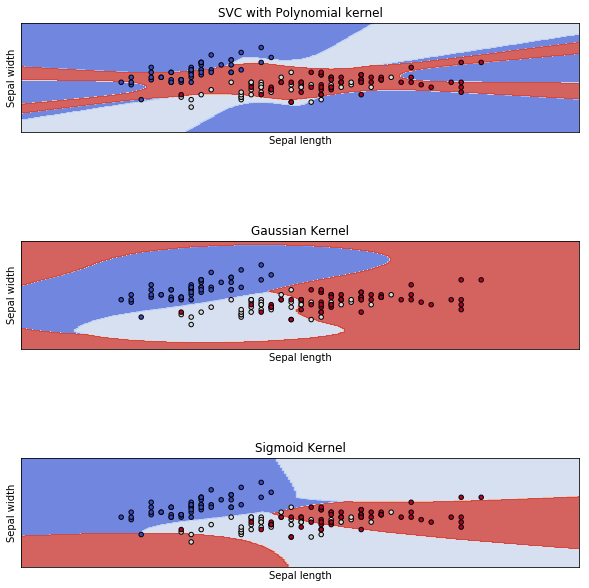

In [11]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets


def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

X, y = import_iris_raw_two_columns()
X, y = X.values, y
# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter

X_train, X_test, y_train, y_test = import_iris_two_columns()

polynomial_svm_clf = polynomial_kernel(X_train, X_test, y_train, y_test)
rbf_svm_clf = gaussian_kernel(X_train, X_test, y_train, y_test)
sigmoid_svm_clf = sigmoid_kernel(X_train, X_test, y_train, y_test)

models = (polynomial_svm_clf, rbf_svm_clf, sigmoid_svm_clf)

# title for the plots
titles = ('SVC with Polynomial kernel', 'Gaussian Kernel', 'Sigmoid Kernel')

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(3, 1)
plt.subplots_adjust(wspace=1, hspace=1)

fig.set_figheight(10)
fig.set_figwidth(10)
#print(X.as_matrix())
X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy,
                  cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal width')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()